<center><h1> Investment Analysis Assignment </h1></center>

# Reading Data

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick

In [302]:
companies_df = pd.read_csv('companies.txt', sep='\t',  encoding="iso-8859-1")
rounds_df = pd.read_csv('rounds2.csv',  encoding="iso-8859-1")

In [303]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [304]:
rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Checkpoint 1: Data Cleaning 1

## 1. How many unique companies are present in rounds2?

In [305]:
companies_df.permalink = companies_df.permalink.str.lower()
rounds_df.company_permalink = rounds_df.company_permalink.str.lower()
companies_df.name = companies_df.name.str.lower()

In [306]:
temp = pd.merge(companies_df, rounds_df, left_on= 'permalink', right_on = 'company_permalink', how = 'inner')
temp.describe(include = 'all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422,114942,114942,114942,31139,114942,9.495800e+04
unique,66363,66032,61188,27295,4,137,311,1092,5111,3977,66363,114942,14,8,5033,NaN
top,/organization/solarflare,solarflare communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/solarflare,/funding-round/5fedc0ed37a904cb5f50b88ec3fb9017,venture,A,01-01-2014,NaN
freq,19,19,19,8165,90151,72308,26664,19078,7422,4642,19,1,55493,14746,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.042696e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.148218e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680521e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+06


## 2. How many unique companies are present in companies?

In [307]:
companies_df.describe(include = 'all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66037,61191,27296,4,137,311,1092,5111,3978
top,/organization/matterfab,roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


## 3. In the companies data frame, which column can be used as the unique key for each company?

In [308]:
companies_df[['permalink', 'name']].drop_duplicates().count()

permalink    66368
name         66367
dtype: int64

## 4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [309]:
set(rounds_df.company_permalink.unique()).difference(companies_df.permalink.unique())

{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

## 5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [310]:
master_frame = pd.merge(rounds_df, companies_df, left_on= 'company_permalink', right_on = 'permalink', how = 'left')
print(len(rounds_df), len(companies_df), len(master_frame))

114949 66368 114949


In [311]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


# Checkpoint 2: Funding Type Analysis

In [312]:
temp = pd.DataFrame(master_frame.groupby('funding_round_type').raised_amount_usd.mean()).reset_index()
temp.raised_amount_usd = temp.raised_amount_usd.apply(lambda x: '{:.2f}'.format(x))
temp.sort_values('raised_amount_usd', ascending = False)

,funding_round_type,raised_amount_usd
0,angel,958694.47
7,post_ipo_equity,82182493.87
10,secondary_market,79649630.10
8,private_equity,73308593.03
11,seed,719818.00
3,equity_crowdfunding,538368.21
4,grant,4300576.34
5,non_equity_assistance,411203.05
12,undisclosed,19242370.23
2,debt_financing,17043526.02


# Checkpoint 3: Country Analysis

In [313]:
temp = master_frame[master_frame.funding_round_type == 'venture']
temp.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [314]:
temp.country_code.unique()

array(['IND', 'USA', nan, 'CHN', 'CAN', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'ESP', 'NLD', 'RUS', 'BEL', 'JPN', 'BGR', 'HUN',
       'DEU', 'CHE', 'ITA', 'HKG', 'TUR', 'BRA', 'FIN', 'PRT', 'SVN',
       'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'AUS', 'NZL', 'MUS', 'AUT', 'ARG', 'PHL', 'MNE', 'PSE', 'MYS',
       'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'VNM', 'IDN', 'CYP',
       'SVK', 'ARE', 'EGY', 'ARM', 'BGD', 'TUN', 'KEN', 'COL', 'CZE',
       'CMR', 'LUX', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'TTO',
       'URY', 'JOR', 'PAK', 'HRV', 'UKR', 'CRI', 'BMU', 'PAN', 'MMR',
       'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT',
       'MCO', 'BAH', 'GHA', 'RWA', 'MOZ', 'KWT', 'UGA', 'LAO', 'MKD',
       'BWA', 'BHR', 'MAF', 'GIB'], dtype=object)

In [315]:
top9 = temp.groupby('country_code').raised_amount_usd.sum().reset_index()
top9 = top9.sort_values('raised_amount_usd', ascending = False).reset_index(drop = True).iloc[:9,:]
top9.raised_amount_usd = top9.raised_amount_usd.apply(lambda x: '{:.2f}'.format(x))
top9

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


# Checkpoint 4: Sector Analysis 1

In [316]:
mapping_df = pd.read_csv('mapping.csv')
mapping_df['main_sector'] = mapping_df.iloc[:, 1:].idxmax(axis=1)
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [317]:
master_frame['primary_sector'] = master_frame.category_list.str.split('|').str[0]

In [318]:
master_frame = pd.merge(master_frame, mapping_df[['category_list', 'main_sector']], left_on = 'primary_sector',right_on = 'category_list', how = 'left')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,Apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"


In [319]:
d1 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'USA')]
d2 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'GBR')]
d3 = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code == 'IND')]

In [320]:
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Software,Others
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN,NaN
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN,NaN
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN,NaN


In [321]:
def place_value(number): 
    return ("{:,}".format(number).split('.')[0])

In [322]:
# Total Number of Investments Count
print('Total number of Investments (count) for D1 is : {0}'.format(place_value(d1.raised_amount_usd.dropna().count())))
print('Total number of Investments (count) for D2 is : {0}'.format(place_value(d2.raised_amount_usd.dropna().count())))
print('Total number of Investments (count) for D3 is : {0}'.format(place_value(d3.raised_amount_usd.dropna().count())))

Total number of Investments (count) for D1 is : 36,139
Total number of Investments (count) for D2 is : 2,055
Total number of Investments (count) for D3 is : 824


In [323]:
# Total amount of investment (USD) 
print('Total amount of investment (USD) for D1 is : {0}'.format(place_value(d1.raised_amount_usd.dropna().sum())))
print('Total amount of investment (USD) for D2 is : {0}'.format(place_value(d2.raised_amount_usd.dropna().sum())))
print('Total amount of investment (USD) for D3 is : {0}'.format(place_value(d3.raised_amount_usd.dropna().sum())))

Total amount of investment (USD) for D1 is : 422,510,842,796
Total amount of investment (USD) for D2 is : 20,245,627,416
Total amount of investment (USD) for D3 is : 14,391,858,718


In [324]:
# Top Sector name (no. of investment-wise)
print('Top Sector name (no. of investment-wise) for D1 is : {0}'.format(d1['main_sector'].value_counts().reset_index().iloc[0,0]))
print('Top Sector name (no. of investment-wise) for D2 is : {0}'.format(d2['main_sector'].value_counts().reset_index().iloc[0,0]))
print('Top Sector name (no. of investment-wise) for D3 is : {0}'.format(d3['main_sector'].value_counts().reset_index().iloc[0,0]))

Top Sector name (no. of investment-wise) for D1 is : Others
Top Sector name (no. of investment-wise) for D2 is : Others
Top Sector name (no. of investment-wise) for D3 is : Others


In [325]:
# Second Sector name (no. of investment-wise)
print('Second Sector name (no. of investment-wise) for D1 is : {0}'.format(d1['main_sector'].value_counts().reset_index().iloc[1,0]))
print('Second Sector name (no. of investment-wise) for D2 is : {0}'.format(d2['main_sector'].value_counts().reset_index().iloc[1,0]))
print('Second Sector name (no. of investment-wise) for D3 is : {0}'.format(d3['main_sector'].value_counts().reset_index().iloc[1,0]))

Second Sector name (no. of investment-wise) for D1 is : Cleantech / Semiconductors
Second Sector name (no. of investment-wise) for D2 is : Cleantech / Semiconductors
Second Sector name (no. of investment-wise) for D3 is : News, Search and Messaging


In [326]:
# Third Sector name (no. of investment-wise)
print('Third Sector name (no. of investment-wise) for D1 is : {0}'.format(d1['main_sector'].value_counts().reset_index().iloc[2,0]))
print('Third Sector name (no. of investment-wise) for D2 is : {0}'.format(d2['main_sector'].value_counts().reset_index().iloc[2,0]))
print('Third Sector name (no. of investment-wise) for D3 is : {0}'.format(d3['main_sector'].value_counts().reset_index().iloc[2,0]))

Third Sector name (no. of investment-wise) for D1 is : Social, Finance, Analytics, Advertising
Third Sector name (no. of investment-wise) for D2 is : Social, Finance, Analytics, Advertising
Third Sector name (no. of investment-wise) for D3 is : Social, Finance, Analytics, Advertising


In [327]:
# Number of investments in top sector (3)
print('Number of investments in top sector for D1 is : {0}'.format(d1[d1.main_sector == d1['main_sector'].value_counts().reset_index().iloc[0,0]].raised_amount_usd.dropna().count()))
print('Number of investments in top sector for D2 is : {0}'.format(d2[d2.main_sector == d2['main_sector'].value_counts().reset_index().iloc[0,0]].raised_amount_usd.dropna().count()))
print('Number of investments in top sector for D3 is : {0}'.format(d3[d3.main_sector == d3['main_sector'].value_counts().reset_index().iloc[0,0]].raised_amount_usd.dropna().count()))

Number of investments in top sector for D1 is : 8243
Number of investments in top sector for D2 is : 507
Number of investments in top sector for D3 is : 281


In [328]:
# Number of investments in second sector (4)
print('Number of investments in second sector (4) for D1 is : {0}'.format(d1[d1.main_sector == d1['main_sector'].value_counts().reset_index().iloc[1,0]].raised_amount_usd.dropna().count()))
print('Number of investments in second sector (4) for D2 is : {0}'.format(d2[d2.main_sector == d2['main_sector'].value_counts().reset_index().iloc[1,0]].raised_amount_usd.dropna().count()))
print('Number of investments in second sector (4) for D3 is : {0}'.format(d3[d3.main_sector == d3['main_sector'].value_counts().reset_index().iloc[1,0]].raised_amount_usd.dropna().count()))

Number of investments in second sector (4) for D1 is : 7849
Number of investments in second sector (4) for D2 is : 433
Number of investments in second sector (4) for D3 is : 130


In [329]:
# Number of investments in third sector (5)
print('Number of investments in third sector (5) for D1 is : {0}'.format(d1[d1.main_sector == d1['main_sector'].value_counts().reset_index().iloc[2,0]].raised_amount_usd.dropna().count()))
print('Number of investments in third sector (5) for D2 is : {0}'.format(d2[d2.main_sector == d2['main_sector'].value_counts().reset_index().iloc[2,0]].raised_amount_usd.dropna().count()))
print('Number of investments in third sector (5) for D3 is : {0}'.format(d3[d3.main_sector == d3['main_sector'].value_counts().reset_index().iloc[2,0]].raised_amount_usd.dropna().count()))

Number of investments in third sector (5) for D1 is : 5156
Number of investments in third sector (5) for D2 is : 318
Number of investments in third sector (5) for D3 is : 77


In [330]:
# For point 3 (top sector count-wise), which company received the highest investment?
print('For point 3 (top sector count-wise), which company received the highest investment? for D1 is : {0}'.format(d1[d1.main_sector == d1['main_sector'].value_counts().reset_index().iloc[0,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))
print('For point 3 (top sector count-wise), which company received the highest investment? for D2 is : {0}'.format(d2[d2.main_sector == d2['main_sector'].value_counts().reset_index().iloc[0,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))
print('For point 3 (top sector count-wise), which company received the highest investment? for D3 is : {0}'.format(d3[d3.main_sector == d3['main_sector'].value_counts().reset_index().iloc[0,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))

For point 3 (top sector count-wise), which company received the highest investment? for D1 is : sofi
For point 3 (top sector count-wise), which company received the highest investment? for D2 is : oneweb
For point 3 (top sector count-wise), which company received the highest investment? for D3 is : flipkart


In [331]:
# For point 4 (second best sector count-wise), which company received the highest investment?
print('For point 3 (top sector count-wise), which company received the highest investment? for D1 is : {0}'.format(d1[d1.main_sector == d1['main_sector'].value_counts().reset_index().iloc[1,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))
print('For point 3 (top sector count-wise), which company received the highest investment? for D2 is : {0}'.format(d2[d2.main_sector == d2['main_sector'].value_counts().reset_index().iloc[1,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))
print('For point 3 (top sector count-wise), which company received the highest investment? for D3 is : {0}'.format(d3[d3.main_sector == d3['main_sector'].value_counts().reset_index().iloc[1,0]].groupby('name').raised_amount_usd.sum().reset_index().sort_values('raised_amount_usd', ascending = False).iloc[0,0]))

For point 3 (top sector count-wise), which company received the highest investment? for D1 is : freescale semiconductor
For point 3 (top sector count-wise), which company received the highest investment? for D2 is : immunocore
For point 3 (top sector count-wise), which company received the highest investment? for D3 is : quikr


# Checkpoint 6: Plots

## Plot 1

In [332]:
temp = master_frame[(master_frame.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity']))]
temp = temp.groupby('funding_round_type').agg({'raised_amount_usd' : ['sum', 'mean']}).reset_index()
temp.columns = temp.columns.droplevel()
temp.columns = ['Funding_Type', 'Sum_of_Investments', 'Average_of_Investments']

temp

,Funding_Type,Sum_of_Investments,Average_of_Investments
0,angel,4.659255e+09,9.586945e+05
1,private_equity,1.419254e+11,7.330859e+07
2,seed,1.698986e+10,7.198180e+05
3,venture,5.901262e+11,1.174895e+07


In [333]:
# Thanks to the Source 
# Code Imported from Link : https://dfrieds.com/data-visualizations/how-format-large-tick-values

sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format

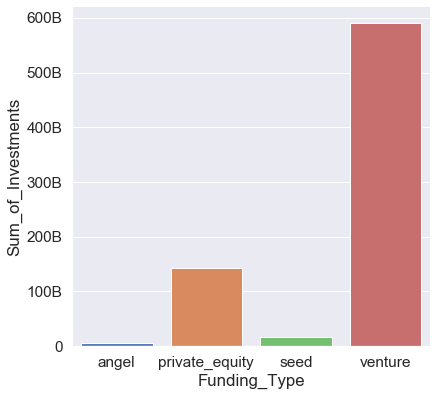

In [334]:
sns.catplot(x="Funding_Type", y="Sum_of_Investments", data=temp, height=6, kind="bar", palette="muted")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

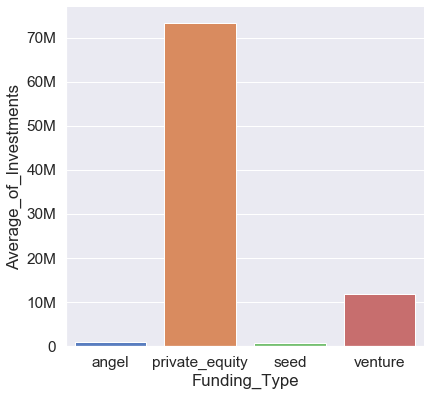

In [335]:
sns.catplot(x="Funding_Type", y="Average_of_Investments", data=temp, height=6, kind="bar", palette="muted")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

## Plot 2

In [336]:
temp = master_frame[master_frame.funding_round_type == 'venture']
top9 = temp.groupby('country_code').raised_amount_usd.sum().reset_index()
top9 = top9.sort_values('raised_amount_usd', ascending = False).reset_index(drop = True).iloc[:9,:]
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


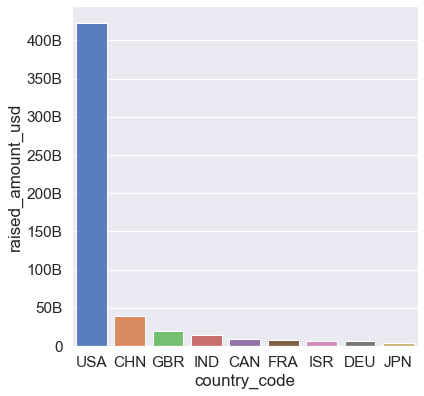

In [337]:
sns.catplot(x="country_code", y="raised_amount_usd", data=top9, height=6, kind="bar", palette="muted")
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

## Plot 3

In [338]:
temp = master_frame[(master_frame.funding_round_type == 'venture') & (master_frame.country_code.isin(['USA','GBR','IND'])) & (master_frame.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']))]
temp = temp[['country_code', 'main_sector', 'raised_amount_usd']].dropna()
temp = temp.groupby(['country_code', 'main_sector']).raised_amount_usd.count().reset_index()

In [339]:
temp

,country_code,main_sector,raised_amount_usd
0,GBR,Cleantech / Semiconductors,433
1,GBR,Others,507
2,GBR,"Social, Finance, Analytics, Advertising",318
3,IND,Cleantech / Semiconductors,54
4,IND,Others,281
5,IND,"Social, Finance, Analytics, Advertising",77
6,USA,Cleantech / Semiconductors,7849
7,USA,Others,8243
8,USA,"Social, Finance, Analytics, Advertising",5156


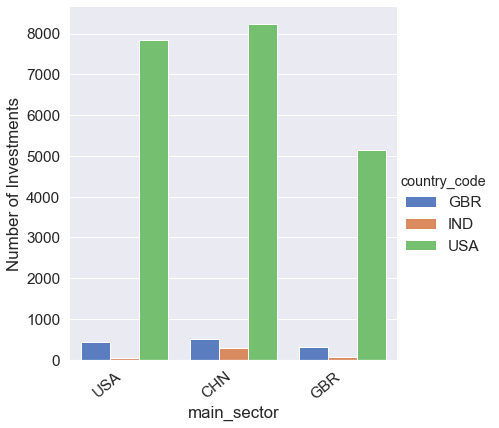

In [340]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="main_sector", y="raised_amount_usd", hue="country_code", data=temp,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.set_ylabels("Number of Investments")